# Tasks 2020

## Task One
Write a Python function called sqrt2 that calculates and
prints to the screen the square root of 2 to 100 decimal places. Your code should
not depend on any module from the standard library1 or otherwise. You should
research the task first and include references and a description of your algorithm.


In [116]:
def sqrt2(x):
    #Initial guess for the the square root of z
    z = x / 2
    #Loop until we're happy with the accuracy.
    while abs(x - (z * z))>0.0000001:
        #Calculate a better guess for the square root.
        z -= (z * z - x) / (2 * z)
    #Return the approximate square for root x and round it to 100 places
    return format(z, '.100f')

In [117]:
#Calling the square root function "sqrt2" with input of 2
sqrt2(2)

'1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000'

In [118]:
#Calling the square root function "sqrt2" with input of 2
sqrt2(4)

'2.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'

In [119]:
#Calling the square root function "sqrt2" with input of 2
sqrt2(16)

'4.0000000000000044408920985006261616945266723632812500000000000000000000000000000000000000000000000000'

In [120]:
#Importing and calling the sqrt function from the math library to compare
import math
math.sqrt(2)

1.4142135623730951

## Task Two

The Chi-squared test for independence is a statistical
hypothesis test like a t-test. It is used to analyse whether two categorical variables
are independent. The Wikipedia article gives the table below as an example [4],
stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats
to verify this value and calculate the associated p value. You should include a short
note with references justifying your analysis in a markdown cell.
![title](images/task2.png)


In [121]:
from scipy.stats import chi2_contingency
import pandas as pd

#### Create a data frame similar to the one in the description

In [122]:
collars = pd.DataFrame(
    [
        [90,60,104,95],
        [30,50,51,20],
        [30,40,45,35]
    ],
    index=["White Collar","Blue Collar","No Collar"],
    columns=["A","B","C","D"])
collars

,A,B,C,D
White Collar,90,60,104,95
Blue Collar,30,50,51,20
No Collar,30,40,45,35


#### chi2_contingency
SciPy’s chi2_contingency() returns four values, 𝜒2 value, p-value, degree of freedom and expected values.

Returned values below

In [123]:
chi2_contingency(collars)

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

#### Expected Values
You can find the expected values at the forth in the returned value. It is in an array form so i will create a new table to display them.

The table below is called a contingency table, These values come from the following equation
![title](images/task2-equation.png)

So for example "White Collar (A)" would be (349*150)/650 = 80.54

In [124]:
df=chi2_contingency(collars)[3]
pd.DataFrame(
    data=df[:,:], 
    index=["White Collar","Blue Collar","No Collar"],
    columns=["A","B","C","D"]
).round(2)

,A,B,C,D
White Collar,80.54,80.54,107.38,80.54
Blue Collar,34.85,34.85,46.46,34.85
No Collar,34.62,34.62,46.15,34.62


#### Chi-squared value

The Chi Square value is the first returned value

In [125]:
chi2_contingency(collars)

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

In [126]:
chisquare=chi2_contingency(collars)[0]
chisquare.round(1)

24.6

#### P-Value
p-value measures the probability of seeing the effect when the null hypothesis is true.
You can find the p-value at the second in the returned value.

In [127]:
chi2_contingency(collars)

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

In [128]:
pvalue=chi2_contingency(collars)[1]
pvalue

0.0004098425861096696

### Chi-Squared Value simplified

Below i show how to get the chi squared value in only two lines of code, Third line is rounding the value to one decimal place

In [129]:
CollarRows =[[90,60,104,95],[30,50,51,20],[30,40,45,35]]
ChiValue = chi2_contingency(collars)[0]
ChiValue.round(1)

24.6

## Task Three
The standard deviation of an array of numbers x is
calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**(2)/len(x)) .
However, Microsoft Excel has two different versions of the standard deviation
calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above
calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x) . 

Research these Excel functions, writing a note in a Markdown cell
about the difference between them. Then use numpy to perform a simulation
demonstrating that the STDEV.S calculation is a better estimate for the standard
deviation of a population when performed on a sample. Note that part of this task
is to figure out the terminology in the previous sentence.


#### STDEV.P vs STDEV.S
Standard deviation is a measure of how much variance there is in a set of numbers compared to the average of the numbers. 

STDEV.P assumes that its arguments are the entire population.The standard deviation is calculated using the "n" method. This will give the actual standard deviation on a data sample

STDEV.S assumes that its arguments are a sample of the population. If your data represents the entire population, then compute the standard deviation using STDEV.P. The standard deviation is calculated using the "n-1" method. The sample standard deviation is an estimate what the true population standard deviation is based on a data sample.

If both STDEV.P and STDEV.S were given the same values, the sample standard deviation would give back a higher value due to the denominator "n-1". This is because a sample standard deviation tends to underestimate the true population standard deviation

For large sample sizes, STDEV.S and STDEV.P return approximately equal values.

The difference between the two standard deviations all depends on what the scenario is. The sample deviation is more commonly used as usually we do not have access to the entire population of data.

STDEV.P Formula   ![title](images/STDEVP.png)

STDEV.S Formula   ![title](images/STDEVS.png)


### Calculating STDEV.S
Formula: np.sqrt(np.sum((x - np.mean(x))**(2)/len(x)-1)

In [130]:
import numpy as np # importing numpy to generate random numbers for dataset
#generate an array of 1000 random numbers for population
population = np.random.randint(1,100,1000) 
#create and array sample_x that takes a sample of the population data
sample_x = population[200:400]
#get the length of the sample_x
sample_len = len(sample_x)
#get the average(mean) of sample_x
sample_mean = sample_x.mean()
#start to put together the formula in description above
sum1 = (sample_x - sample_mean)**2/(sample_len-1)
sample_sum = np.sum(sum1)
STDEVS = np.sqrt(sample_sum)
#print Results
print(f"Population Size: {len(population)}\nSample Size: {sample_len}\nSample Standard Deviation: {STDEVS}")

Population Size: 1000
Sample Size: 200
Sample Standard Deviation: 29.118767368577377


### Calculating STDEV.P
Formula: np.sqrt(np.sum((x - np.mean(x))**(2)/len(x))

In [131]:
#get the length of the population
pop_len = len(population)
#get the average(mean) of population
pop_mean = population.mean()
#start to put together the formula in description above
sum2 = (population - pop_mean)**2/(pop_len)
pop_sum = np.sum(sum2)
STDEVP=np.sqrt(pop_sum)
#print Results
print(f"Population Size: {pop_len}\nPopulation Standard Deviation: {STDEVP}\nSample Size: {sample_len}\nSample Standard Deviation: {STDEVS}")

Population Size: 1000
Population Standard Deviation: 28.569441279100996
Sample Size: 200
Sample Standard Deviation: 29.118767368577377


## Task Four

Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.


### Dataset

In [132]:
# Numerical arrays.
import numpy as np
# Machine learning - KMeans.
import sklearn.cluster as skcl
# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns # for Data visualization

dfiris = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
dfiris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Plotting the Dataset

Below i will plot the dataset and group them by species type so we can compare again K-means clustering

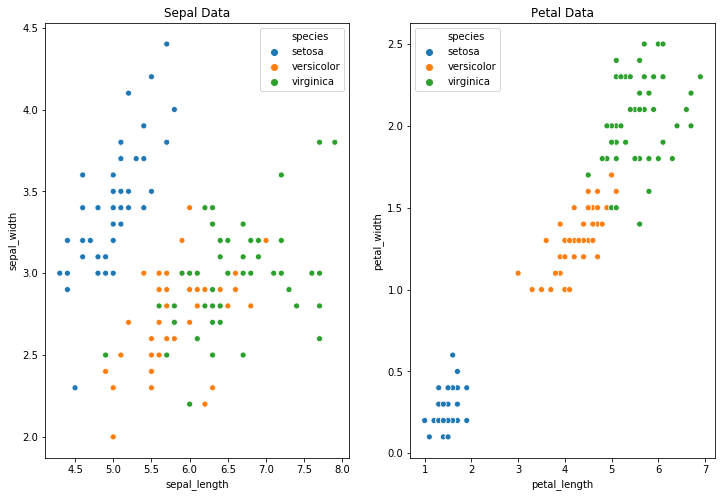

In [133]:
plt.figure(figsize = (12, 8))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Sepal Data')
sns.scatterplot(x ='sepal_length', y ='sepal_width',data =dfiris,hue="species" , ax= ax1);

ax2 = plt.subplot(1,2,2)
ax2.set_title('Petal Data')
sns.scatterplot(x ='petal_length', y ='petal_width',data =dfiris,hue="species" , ax= ax2);

### K- Means Fitting

In [134]:
# Perform kmeans fitting.
sepalData = dfiris[['sepal_length', 'sepal_width']].to_numpy() # Read in sepal data into array
petalData = dfiris[['petal_length', 'petal_width']].to_numpy() # Read in petal data into array

kmeansSepal = skcl.KMeans(n_clusters=3, random_state=0).fit(sepalData) # Create three clusters for sepal
kmeansPetal = skcl.KMeans(n_clusters=3, random_state=0).fit(petalData) # Create three clusters for petal


### Plot the K-means clusters

Below is a plot of the clusters

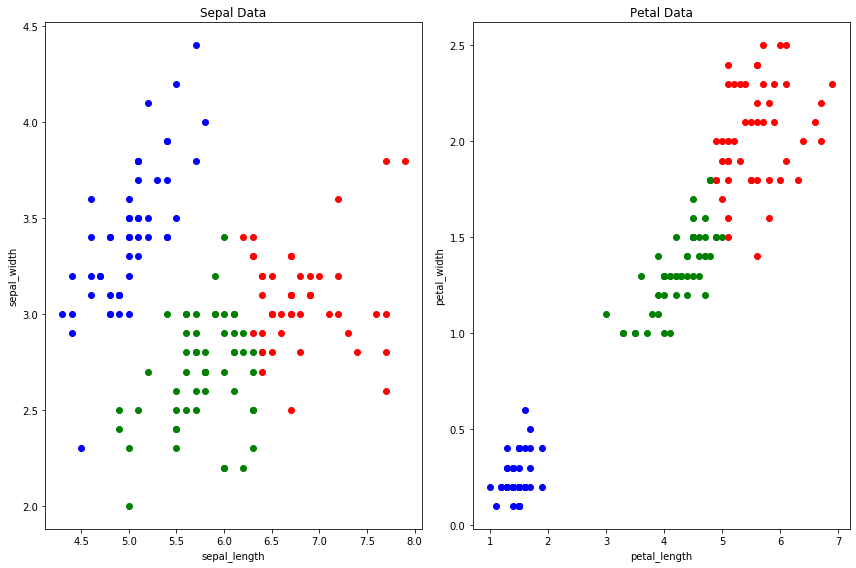

In [135]:
# Plot the data set.
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plt.plot(sepalData[kmeansSepal.labels_ == 0][:,0],sepalData[kmeansSepal.labels_ == 0][:,1], 'bo')
plt.plot(sepalData[kmeansSepal.labels_ == 1][:,0],sepalData[kmeansSepal.labels_ == 1][:,1], 'ro')
plt.plot(sepalData[kmeansSepal.labels_ == 2][:,0],sepalData[kmeansSepal.labels_ == 2][:,1], 'go')
plt.title("Sepal Data")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

plt.subplot(1, 2, 2)
plt.plot(petalData[kmeansPetal.labels_ == 0][:,0],petalData[kmeansPetal.labels_ == 0][:,1], 'bo')
plt.plot(petalData[kmeansPetal.labels_ == 1][:,0],petalData[kmeansPetal.labels_ == 1][:,1], 'ro')
plt.plot(petalData[kmeansPetal.labels_ == 2][:,0],petalData[kmeansPetal.labels_ == 2][:,1], 'go')
plt.title("Petal Data")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.tight_layout()

### Creating random points 
Creating random points and letting K-means predict what cluster they are part of.

To create the random points i used numpy.randoms uniform function that lets me set a high and a low value,
this way i can keep the values to the min sepal/petal and max sepal/petal x and y values

In [136]:
# Create new dummy points for classification.
mySxvals = np.random.uniform(low=4.0, high=8.0, size=(10,)) #10 random sepal x values
mySyvals = np.random.uniform(low=2.5, high=4.5, size=(10,)) #10 random sepal y values 
mynewSepal = np.vstack([mySxvals, mySyvals]).T
mySepalpredictions = kmeansSepal.predict(mynewSepal)

myPxvals = np.random.uniform(low=1.0, high=7.0, size=(10,))
myPyvals = np.random.uniform(low=0.0, high=2.5, size=(10,))
mynewPetal = np.vstack([myPxvals, myPyvals]).T
myPetalpredictions = kmeansPetal.predict(mynewPetal)

### K-means Predictions

Plot graphs with new and old values and let k-means predict which cluster it is part of, Predicted values will be marked with an 'x'

Text(0, 0.5, 'petal_width')

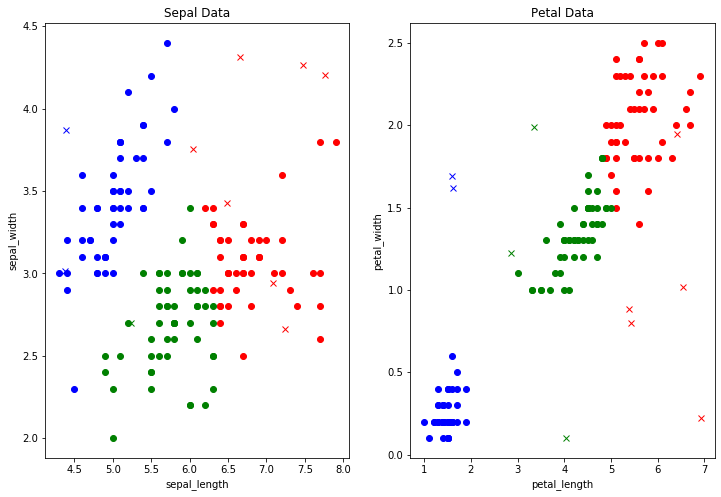

In [137]:
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plt.plot(sepalData[kmeansSepal.labels_ == 0][:,0],sepalData[kmeansSepal.labels_ == 0][:,1], 'bo')
plt.plot(sepalData[kmeansSepal.labels_ == 1][:,0],sepalData[kmeansSepal.labels_ == 1][:,1], 'ro')
plt.plot(sepalData[kmeansSepal.labels_ == 2][:,0],sepalData[kmeansSepal.labels_ == 2][:,1], 'go')
plt.plot(mynewSepal[mySepalpredictions == 0][:,0],mynewSepal[mySepalpredictions == 0][:,1], 'bx')
plt.plot(mynewSepal[mySepalpredictions == 1][:,0],mynewSepal[mySepalpredictions == 1][:,1], 'rx')
plt.plot(mynewSepal[mySepalpredictions == 2][:,0],mynewSepal[mySepalpredictions == 2][:,1], 'gx')
plt.title("Sepal Data")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")


plt.subplot(1, 2, 2)
plt.plot(petalData[kmeansPetal.labels_ == 0][:,0],petalData[kmeansPetal.labels_ == 0][:,1], 'bo')
plt.plot(petalData[kmeansPetal.labels_ == 1][:,0],petalData[kmeansPetal.labels_ == 1][:,1], 'ro')
plt.plot(petalData[kmeansPetal.labels_ == 2][:,0],petalData[kmeansPetal.labels_ == 2][:,1], 'go')
plt.plot(mynewPetal[myPetalpredictions == 0][:,0],mynewPetal[myPetalpredictions == 0][:,1], 'bx')
plt.plot(mynewPetal[myPetalpredictions == 1][:,0],mynewPetal[myPetalpredictions == 1][:,1], 'rx')
plt.plot(mynewPetal[myPetalpredictions == 2][:,0],mynewPetal[myPetalpredictions == 2][:,1], 'gx')
plt.title("Petal Data")
plt.xlabel("petal_length")
plt.ylabel("petal_width")

### References

1. https://tour.golang.org/flowcontrol/8
2. https://docs.python.org/3/tutorial/floatingpoint.html
3. https://realpython.com/python-square-root-function/
4. https://en.wikipedia.org/wiki/Chi-squared_test
5. https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95
6. https://exceljet.net/excel-functions/excel-stdev.p-function#:~:text=of%20the%20numbers.-,The%20STDEV.,S%20function.
7. https://exceljet.net/excel-functions/excel-stdev.s-function#:~:text=The%20STDEV.,The%20STDEV.
8. https://stackoverflow.com/questions/10897339/python-fetch-first-10-results-from-a-list
9. https://www.youtube.com/watch?v=W7q8kfs1bNI
10. https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review
11. https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285
12. https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html
13. https://gist.github.com/curran/a08a1080b88344b0c8a7
14. https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d
15. https://stackoverflow.com/questions/22071987/generate-random-array-of-floats-between-a-range

# END